# Rebust Url Malware Detection
some explanning

In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from Helpers.preprocess.main import *
from Helpers.experiments import experiments
from Helpers.models.simple_ml import *
from Helpers.preprocess.content_based_features import get_content_based_features
from Helpers.preprocess.host_based_features import get_host_based_features
from Helpers.preprocess.lexical_url_features import get_lexical_url_features


In [4]:
df = pd.read_csv("Data/malicious_phish.csv")
df

url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]

<AxesSubplot:xlabel='type', ylabel='count'>

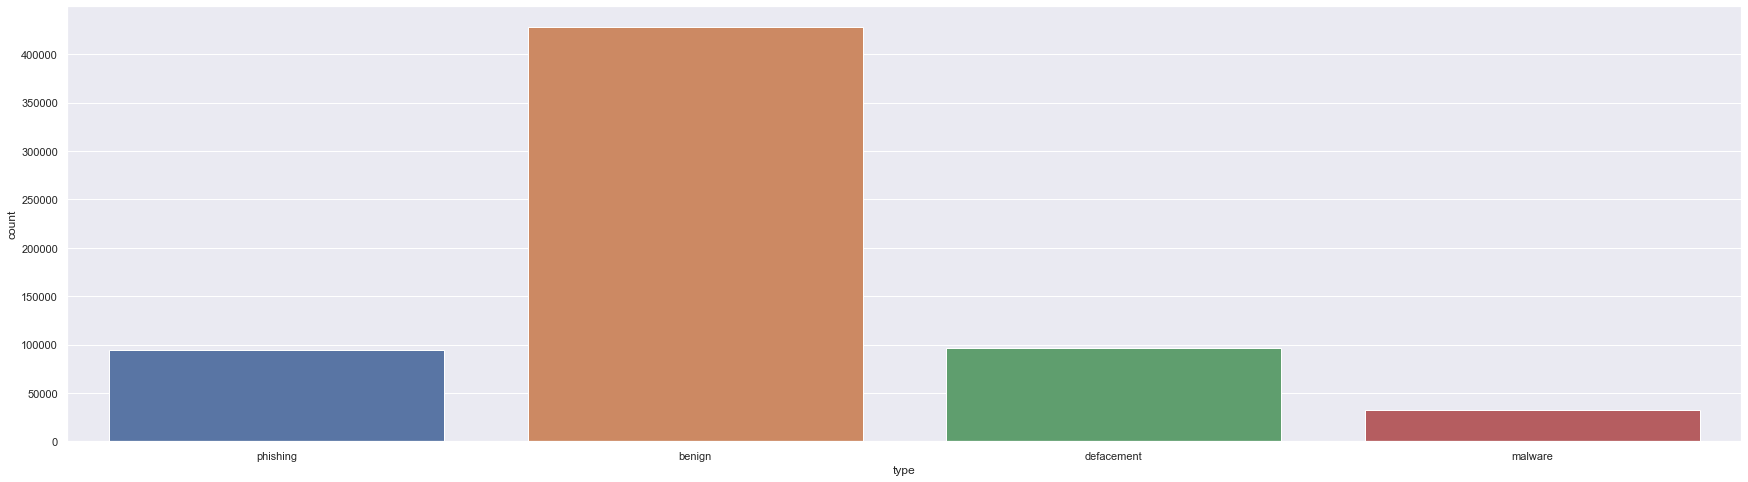

In [5]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(data=df, x='type')

<BarContainer object of 2 artists>

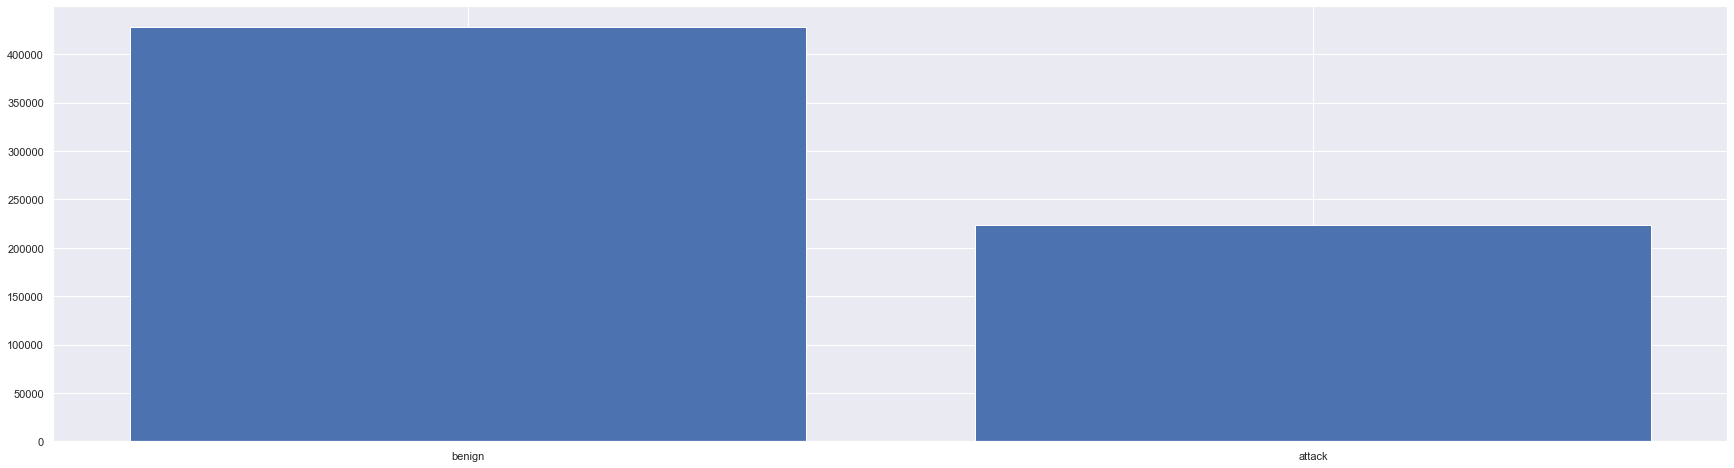

In [6]:
plt.bar(["benign","attack"],[(df['type']=='benign').sum(),(df['type']!='benign').sum()])

## Preproccess

### Lexical Features: 
These refer to statistical features extracted from the literal URL string. For example, length of the URL string, number of digits, number of parameters in its query part, if the URL is encoded, etc.
see https://towardsdatascience.com/extracting-feature-vectors-from-url-strings-for-malicious-url-detection-cbafc24737a

### Content-Based Features
These are obtained from the downloaded HTML code of the webpage. These features capture the structure of the webpage and the content embedded in it. These will include information on script tags, embedded objects, executables, hidden elements, etc.

### Host-Based Features
these are characteristics of the host-name properties of the URL. These provide information about the host of the webpage, for example, country of registration, domain name properties, open ports, named servers, connection speed, time to live from registration, etc.

In [2]:
df = preprocess(cache=True,features_extractors=(get_lexical_url_features,))

In [43]:
# list(df.select_dtypes('O').columns)
# df[df.isna().any(axis=1)].head()
#df = df.dropna(axis='index')

['url', 'url_schema', 'tld']

In [2]:
df

url  ...  úÑ¦~@üþ^t²'ëÆ6T
¯U¶F"-ê}6oã­8aØÜ00
0                                 http://br-icloud.com.br  ...                                               0
1              http://mp3raid.com/music/krizz_kaliko.html  ...                                               0
2                  http://bopsecrets.org/rexroth/cr/1.htm  ...                                               0
3       http://www.garage-pirenne.be/index.php?option=...  ...                                               0
4       http://adventure-nicaragua.net/index.php?optio...  ...                                               0
...                                                   ...  ...                                             ...
651186     http://xbox360.ign.com/objects/850/850402.html  ...                                               0
651187  http://games.teamxbox.com/xbox-360/1860/Dead-S...  ...                                               0
651188  http://www.gamespot.com/xbox360/action/deadspace/  ...                                               0
651189  http://en.wikipedia.org/wiki/Dead_Space_(video...  ...                                               0
651190   http://www.angelfire.com/goth/devilmaycrytonite/  ...                                               0

[651191 rows x 699 columns]

## Models

In [3]:
df = df.select_dtypes(include='number')
X_train, X_test, y_train, y_test = scale_data(df)

In [6]:
df.dropna()

type  url_length  url_path_length  url_host_length  url_host_is_ip  \
0          3        23.0              0.0             16.0             0.0   
1          0        42.0             24.0             11.0             0.0   
2          0        38.0             17.0             14.0             0.0   
3          1        88.0             10.0             21.0             0.0   
4          1       235.0             10.0             23.0             0.0   
...      ...         ...              ...              ...             ...   
651186     3        46.0             24.0             15.0             0.0   
651187     3        51.0             26.0             18.0             0.0   
651188     3        49.0             26.0             16.0             0.0   
651189     3        52.0             29.0             16.0             0.0   
651190     3        48.0             24.0             17.0             0.0   

        url_has_port_in_string  number_of_digits  number_of_parameters  \
0                          0.0               0.0                   0.0   
1                          0.0               1.0                   0.0   
2                          0.0               1.0                   0.0   
3                          0.0               7.0                   4.0   
4                          0.0              22.0                   3.0   
...                        ...               ...                   ...   
651186                     0.0              12.0                   0.0   
651187                     0.0               7.0                   0.0   
651188                     0.0               3.0                   0.0   
651189                     0.0               0.0                   0.0   
651190                     0.0               0.0                   0.0   

        number_of_fragments  is_encoded  ...  á>V>4z¢¶Mù2<¯LOâ¿31È  \
0                       0.0         0.0  ...                        0   
1                       0.0         0.0  ...                        0   
2                       0.0         0.0  ...                        0   
3                       0.0         0.0  ...                        0   
4                       0.0         0.0  ...                        0   
...                     ...         ...  ...                      ...   
651186                  0.0         0.0  ...                        0   
651187                  0.0         0.0  ...                        0   
651188                  0.0         0.0  ...                        0   
651189                  0.0         0.0  ...                        0   
651190                  0.0         0.0  ...                        0   

        äÕ3ñºT-
TÖGÑîÊ­ñòò}¼ae°
ôÈ>´ôÌ~ÀÁÙD¡êÅszõdÕÄzæ±¨a»¿{Áî¤ÇyÏ!ÙÌ¯H¡ÛìÂ<ëK
³Ù'õ+¬"å+$¤Gh±B  \
0                                                       0                                                                
1                                                       0                                                                
2                                                       0                                                                
3                                                       0                                                                
4                                                       0                                                                
...                                                   ...                                                                
651186                                                  0                                                                
651187                                                  0                                                                
651188                                                  0                                                                
651189                                                  0                            

In [7]:
X_train.shape

(520952, 697)

In [8]:
models = [(SimpleDecisionTreeClassifier(),"DecisionTreeClassifier",{"max_depth":8}),
          (RandomForestSimple(),"RandomForest",{"max_depth":8}),
          (KnnModel(),"KNN",{"n_neighbors":8}),
          (SimpleMlp(),"MLP",{"max_iter":10000, "hidden_layer_sizes":(200, 150, 100, 50),
                                 "activation":'relu',
                                 "learning_rate_init":0.001}),
          (LogiticModel(),"LogiticRegression",{"max_iter":10000}),
          (XgboostMultiClass(),"Xgboost",{})]

for model in models:
    modeld.pipeline(X_train, X_test, y_train, y_test)

NameError: name 'max_iter' is not defined

## Deep Learrning Based Bag-Of-Characters

In [5]:
df = df.sample(10000)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=0.0001,token_pattern='.')#max_features=1000
X_counts = count_vect.fit_transform(df['url'])
X_counts

<651178x79 sparse matrix of type '<class 'numpy.int64'>'
	with 15489150 stored elements in Compressed Sparse Row format>

In [62]:
count_vect_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
count_vect_df

!  #  $  %  &  '  (  )  *  ...  ด  ต  ธ  บ  ผ  ฝ  พ  ฟ  ร  ะ
0       0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1       0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
2       0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
3       0  0  0  0  0  3  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
4       0  0  0  0  0  2  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
...    .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
651173  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
651174  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
651175  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
651176  0  0  0  0  0  0  0  1  1  0  ...  0  0  0  0  0  0  0  0  0  0
651177  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[651178 rows x 79 columns]

In [63]:
X = X_counts.toarray()
y = df['type']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(520942, 79) (520942,)
(130236, 79) (130236,)


In [65]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [88]:
model = Sequential()
model.add(LSTM(48,input_shape=(79,1),recurrent_dropout=0.5))
model.add(Dense(24, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 48)                9600      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [81]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

In [84]:
y_train = y_train.values
y_train = y_train.reshape((y_train.size,1))

In [86]:
X_train.shape,y_train.shape

((520942, 79, 1), (520942, 1))

In [89]:
model.fit(X_train,y_train,epochs=100, batch_size=500)

Epoch 1/2
1042/1042 [==============================] - 174s 166ms/step - loss: -0.0646 - accuracy: 0.1990
Epoch 2/2
1042/1042 [==============================] - 172s 165ms/step - loss: -5.5635 - accuracy: 0.1822
